<a href="https://colab.research.google.com/github/Farrukhbala/SSUET-AI-Assignments/blob/master/IMDB_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import imdb
import numpy as np

In [2]:
(train_data, train_labels) , (test_data, test_labels) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 3s 0us/step


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
#word_index is a dictionary mapping words to an integer index

word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
#we reverse it, mapping interger indices to words

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [0]:
#We decode the review; note that our indices wese offset by 3
# Because 0, 1 and 2 are reverved indeices for 'padding' , 'start of sequence', and 'unknown'.

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])


In [0]:
def vectorize_sequences(sequences, dimension = 10000):
  
  #create an all zero matrix of shape (len(sequence), dimension)
  
  results = np.zeros((len(sequences), dimension))
  
  for i , sequence in enumerate(sequences):
    results[i, sequence] = 1.  # set specific indices of results[i] to 1s
  return results

#Our vectorized training data
x_train = vectorize_sequences(train_data)

#our vectorized test data
x_test = vectorize_sequences(test_data)

In [15]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
#our vectorized labels

y_train = np.asarray(train_labels).astype('float32')

y_test = np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers


model = models.Sequential()

In [18]:
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.add(layers.Dense(16, activation = 'relu'))

In [0]:
model.add(layers.Dense(1, activation = 'sigmoid'))

In [0]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [0]:
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr=0.001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [0]:
from keras import losses 
from keras import metrics

In [0]:
model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

In [0]:
x_val = x_train[:10000]

partial_x_train = x_train[10000:]

y_val = y_train[:10000]

partial_y_train = y_train[10000:]

In [30]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 206us/step - loss: 0.5086 - binary_accuracy: 0.7815 - val_loss: 0.3795 - val_binary_accuracy: 0.8690
Epoch 2/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.3004 - binary_accuracy: 0.9049 - val_loss: 0.3004 - val_binary_accuracy: 0.8900
Epoch 3/20
15000/15000 [==============================] - 2s 150us/step - loss: 0.2179 - binary_accuracy: 0.9281 - val_loss: 0.3086 - val_binary_accuracy: 0.8715
Epoch 4/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.1750 - binary_accuracy: 0.9432 - val_loss: 0.2843 - val_binary_accuracy: 0.8839
Epoch 5/20
15000/15000 [==============================] - 2s 149us/step - loss: 0.1426 - binary_accuracy: 0.9543 - val_loss: 0.2848 - val_binary_accuracy: 0.8866
Epoch 6/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.1149 - bin

In [0]:
history_dic = history.history

In [33]:
history_dic.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

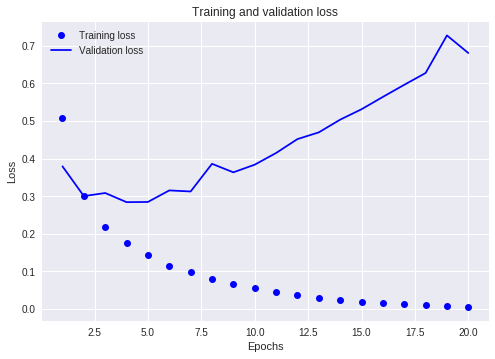

In [35]:
import matplotlib.pyplot as plt
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

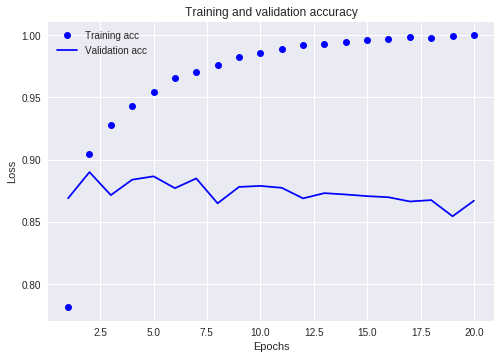

In [38]:
plt.clf() # clear figure
acc_values = history_dic['binary_accuracy']
val_acc_values = history_dic['val_binary_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [46]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=0.01),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model1.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 121us/step - loss: 0.4745 - binary_accuracy: 0.7837
Epoch 2/4
25000/25000 [==============================] - 3s 106us/step - loss: 0.2467 - binary_accuracy: 0.9007
Epoch 3/4
25000/25000 [==============================] - 3s 106us/step - loss: 0.1914 - binary_accuracy: 0.9237
Epoch 4/4
25000/25000 [==============================] - 2s 83us/step


In [47]:
results

[0.3120817059707642, 0.87604]

In [48]:
model.predict(x_test)

array([[0.0426186 ],
       [0.99999255],
       [0.9918673 ],
       ...,
       [0.11019436],
       [0.05872443],
       [0.938228  ]], dtype=float32)